In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Wczytywanie danych

In [2]:
all_filenames = {
    'daily': {
        'pzu': './pzu_01-06-2010_01-01_2015.csv',
        'pxm': './pxm_01-06-2010_01-01_2015.csv',
        'itg': './itg_01-06-2010_01-01_2015.csv'
    },
    'weekly': {
        'pzu': './pzu_01-06-2010_01-01_2015_weekly.csv',
        'pxm': './pxm_01-06-2010_01-01_2015_weekly.csv',
        'itg': './itg_01-06-2010_01-01_2015_weekly.csv'
    },
    'monthly': {
        'pzu': './pzu_01-06-2010_01-01_2015_monthly.csv',
        'pxm': './pxm_01-06-2010_01-01_2015_monthly.csv',
        'itg': './itg_01-06-2010_01-01_2015_monthly.csv'
    }
}

filenames = all_filenames['monthly']

In [3]:
phase_col_names = ['Zamkniecie']
date_col_name = 'Data'
date_format = '%Y-%m-%d'
usecols = [date_col_name] + phase_col_names

dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

def csv_file_to_df(filename):
    assert(len(filename) > 0)
    df = pd.read_csv(filename, parse_dates=[date_col_name], date_parser=dateparse, usecols=usecols)
    return df.set_index(date_col_name)

data_frames = dict(((name, csv_file_to_df(filename)) for name, filename in filenames.items()))
assert(len(data_frames) == 3)

In [38]:
data_frames

{'itg':             Zamkniecie
 Data                  
 2010-06-30       71.00
 2010-07-30       76.50
 2010-08-31       65.80
 2010-09-30       71.00
 2010-10-29       74.60
 2010-11-30       79.75
 2010-12-31       79.70
 2011-01-31       78.00
 2011-02-28       80.95
 2011-03-31       84.10
 2011-04-29      107.00
 2011-05-31      118.90
 2011-06-30      118.00
 2011-07-29      110.40
 2011-08-31      104.90
 2011-09-30      103.90
 2011-10-31       98.80
 2011-11-30       99.00
 2011-12-30      114.40
 2012-01-31      128.50
 2012-02-29      137.30
 2012-03-30      152.90
 2012-04-30      138.00
 2012-05-31      133.40
 2012-06-29      141.00
 2012-07-31      134.00
 2012-08-31      127.70
 2012-09-28      137.60
 2012-10-31      160.50
 2012-11-30      169.40
 2012-12-31      184.50
 2013-01-31      189.70
 2013-02-28      179.90
 2013-03-29      188.00
 2013-04-30      197.00
 2013-05-31      252.50
 2013-06-28      264.00
 2013-07-31      315.00
 2013-08-30      287.00
 2013-09-

## Wykresy, przedział czasowy od 2011-01-01 do 2015-01-01

Wybrałem ten sam przedział dla wszystkich akcji, bo z jednej strony ułatwiło mi to analizę zmian ich wartość, a z drugiej wg tego, co wyczytałem w Sieci, na polskim rynku optymalnym jest najczęściej horyzont 3-5 razy dłuższy od długości planowanej inwestycji.

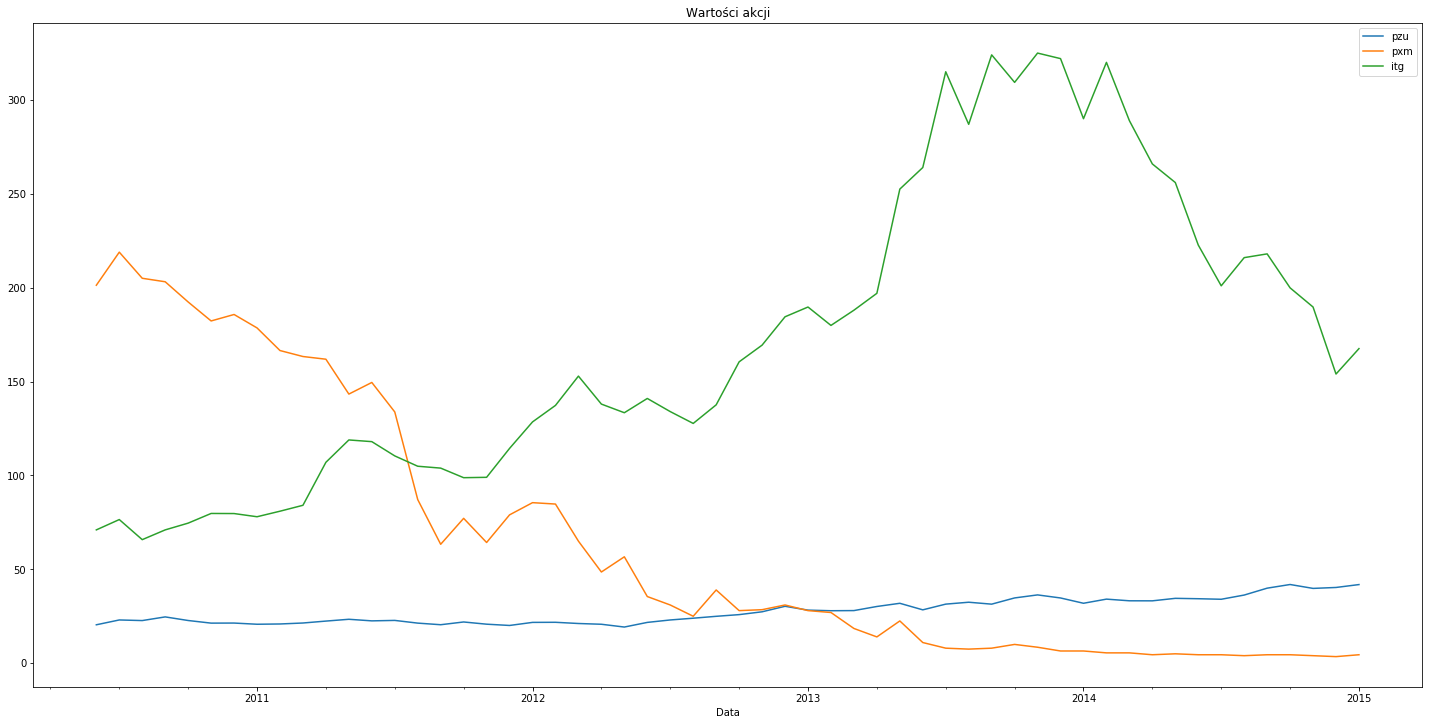

In [4]:
figsize = (20, 10)
kind = 'line'

def plot_data_frames(data_frames):
    for name, df in data_frames.items():
        df['Zamkniecie'].plot(kind=kind, figsize=figsize, label=name)
        
plot_data_frames(data_frames)
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.title("Wartości akcji")
plt.show()

### Średnie stopy zwrotu dla całego rozpatrywanego okresu

In [5]:
def show_pct_changes(data_frames):
    for name, data_frame in data_frames.items():
        print('{}: {}'.format(name, data_frame.pct_change().mean()))
        
show_pct_changes(data_frames)

pzu: Zamkniecie    0.01477
dtype: float64
pxm: Zamkniecie   -0.046168
dtype: float64
itg: Zamkniecie    0.020244
dtype: float64


### Wykresy średnich ruchomych poszczególnych stóp zwrotu

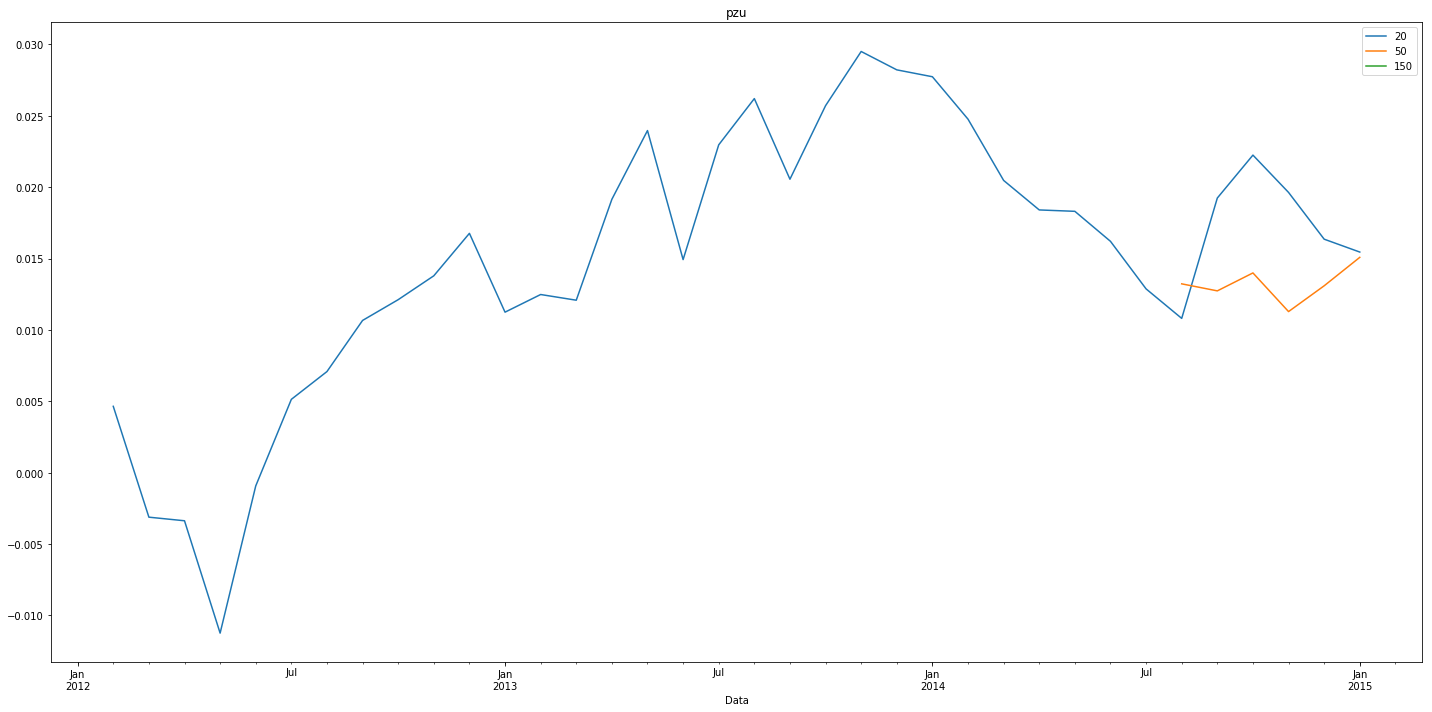

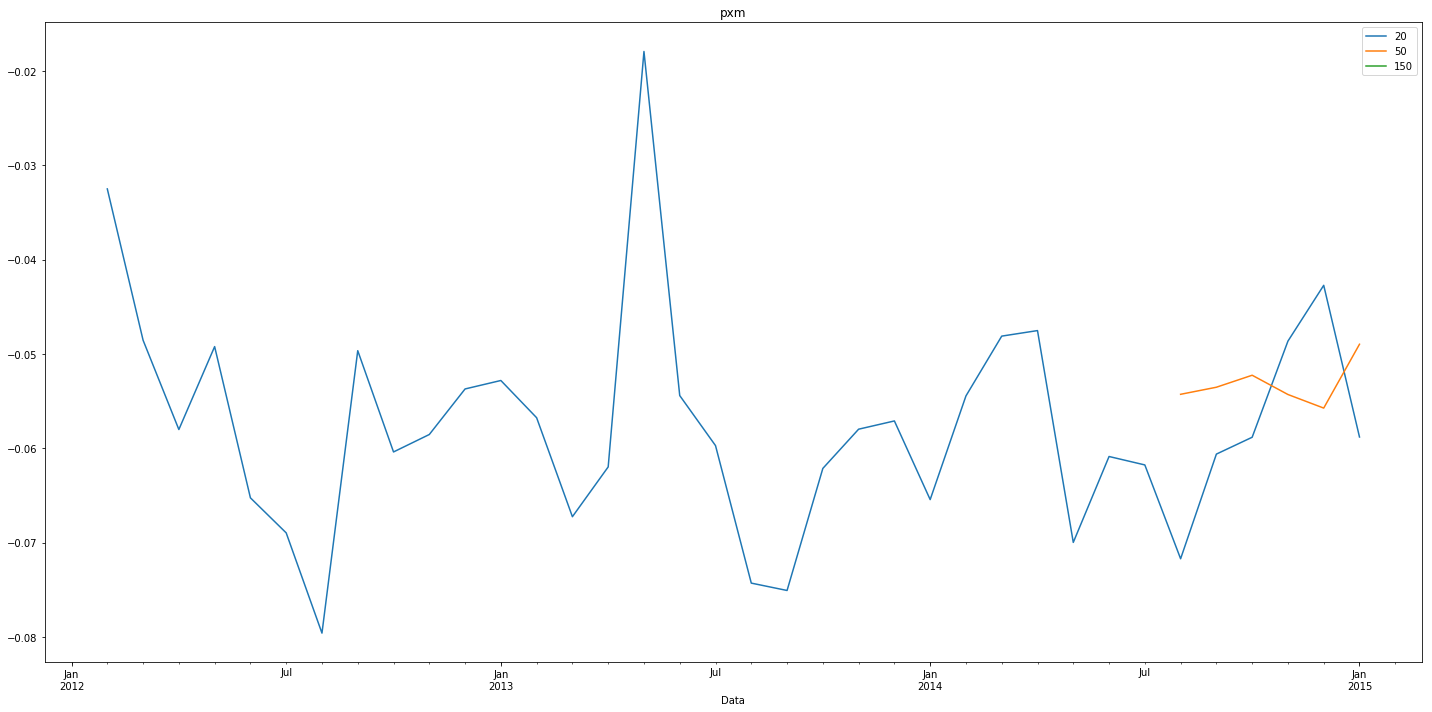

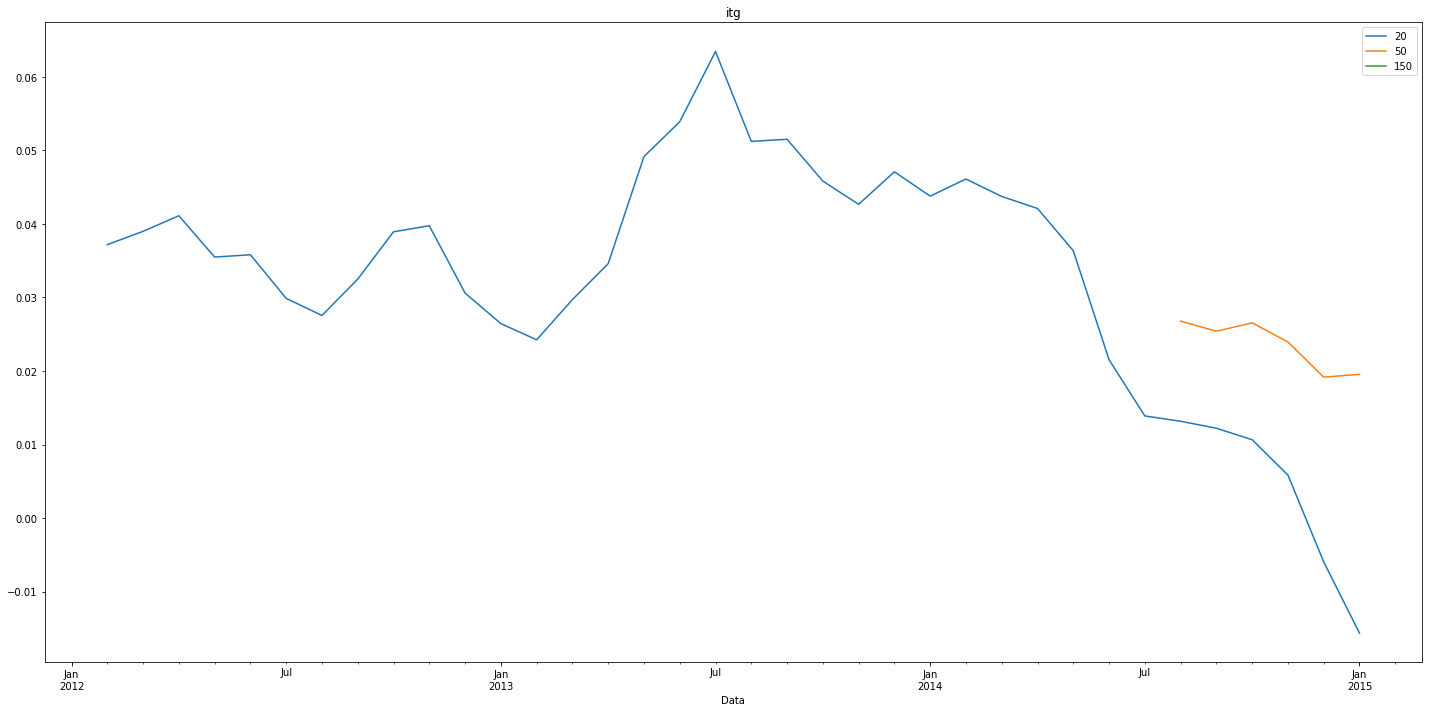

In [6]:
periods = (20, 50, 150)

def plot_pct_changes(name, data_frame):
    close = data_frame.pct_change()
    #data_frame.pct_change().plot()
    for period in periods:
        close.rolling(period, center=False).mean().plot(title=name, figsize=figsize, label='{}'.format(period))
    
    plt.legend(bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

for name, data_frame in data_frames.items():
    plot_pct_changes(name, data_frame['Zamkniecie'])

### Wykładnicza średnia ważona dla stóp zwrotu

[0.005]


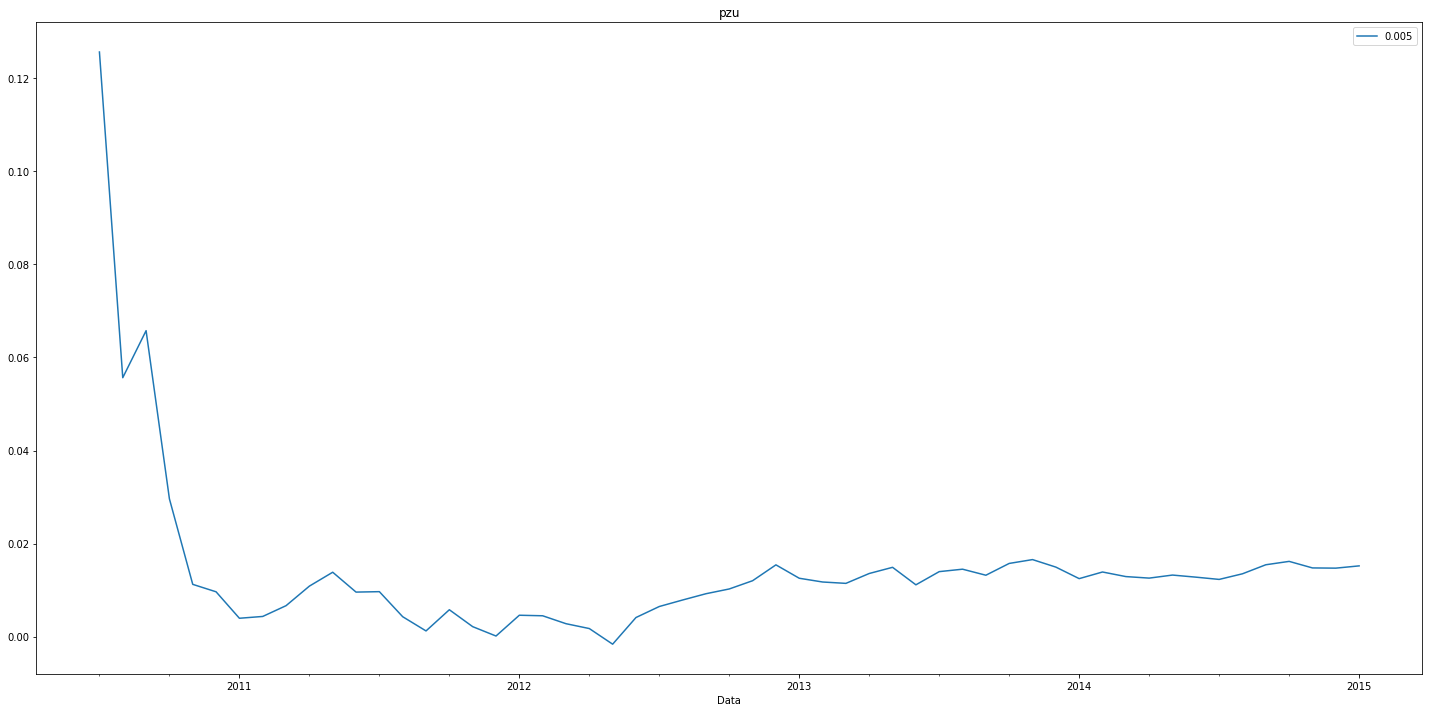

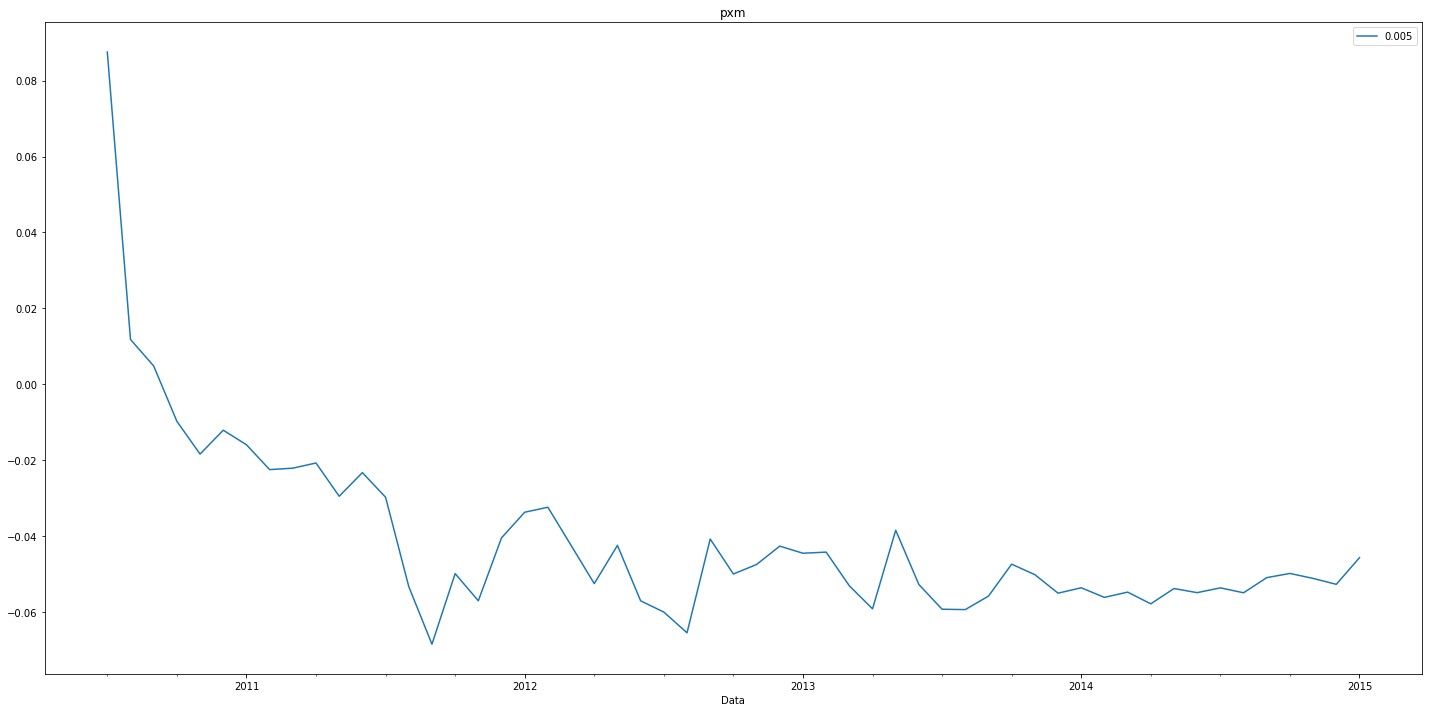

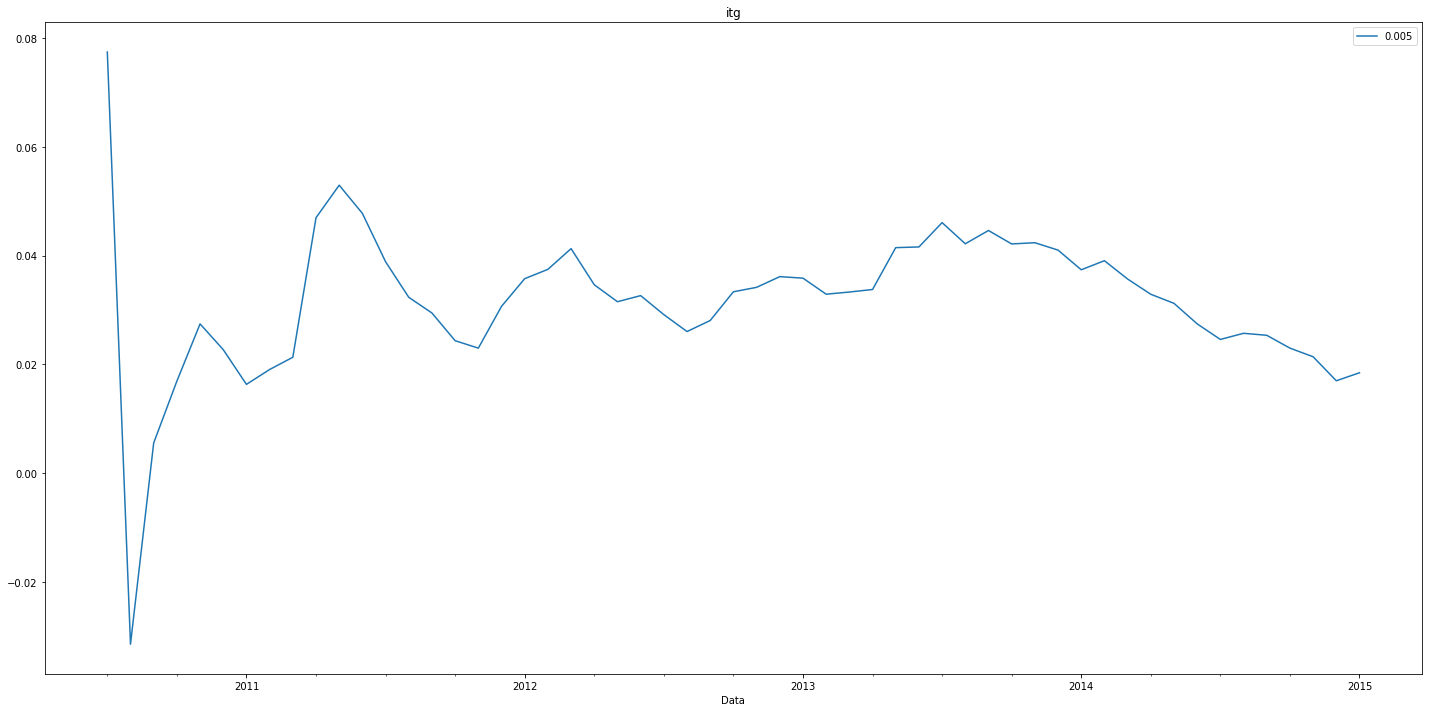

In [7]:
alphas_count = 2
alphas = [0.005]
print(alphas)

def plot_weighted_pct_changes(name, data_frame):
    close = data_frame.pct_change()
    for alpha in alphas:
        close.ewm(alpha=alpha).mean().plot(title=name, figsize=figsize, label='{}'.format(alpha))
    
    plt.legend(bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

for name, data_frame in data_frames.items():
    plot_weighted_pct_changes(name, data_frame['Zamkniecie'])

### Analogiczne wykresy ale dla odchyleń standardowych stóp zwrotu (do zweryfikowania)

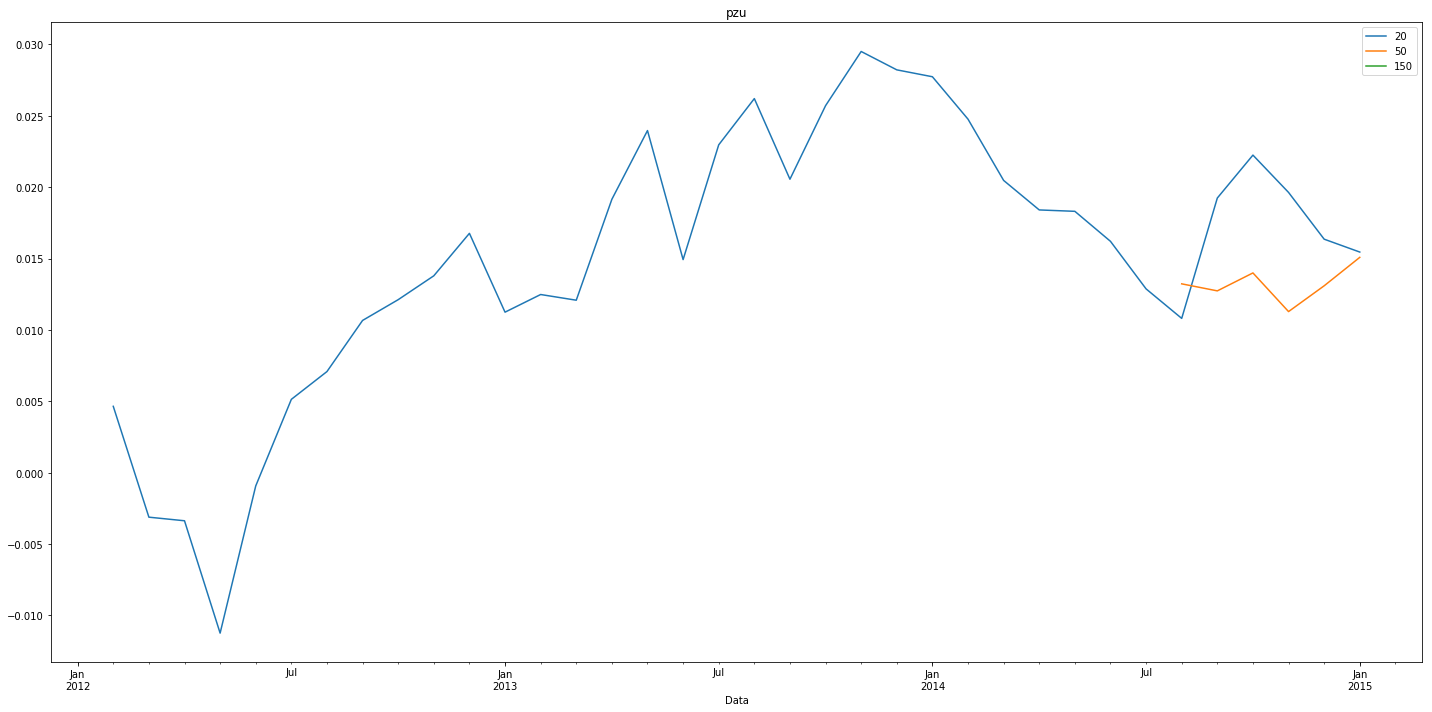

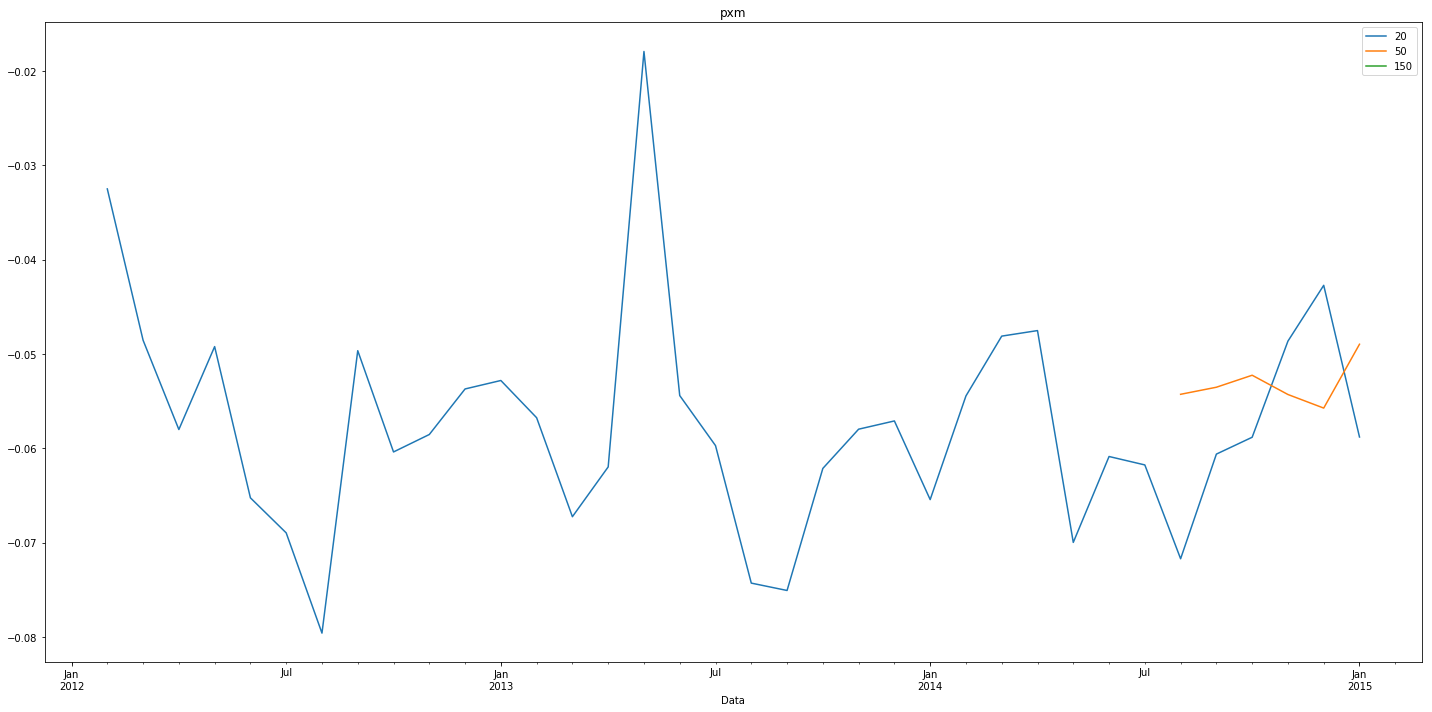

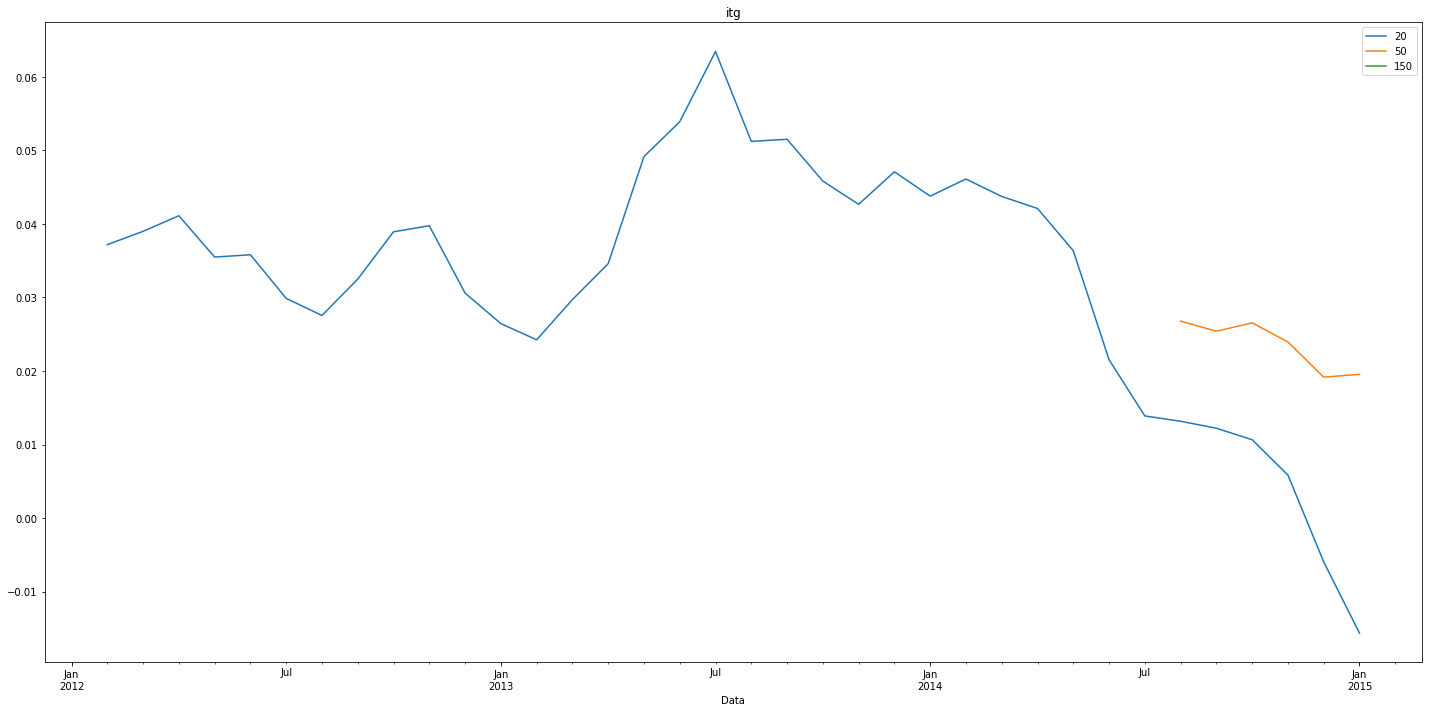

In [8]:
periods = (20, 50, 150)

def plot_std_changes(name, data_frame):
    close = data_frame.pct_change()
    #data_frame.pct_change().plot()
    for period in periods:
        close.rolling(period, center=False).std().plot(title=name, figsize=figsize, label='{}'.format(period))
    
    plt.legend(bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

for name, data_frame in data_frames.items():
    plot_pct_changes(name, data_frame['Zamkniecie'])

[0.005]


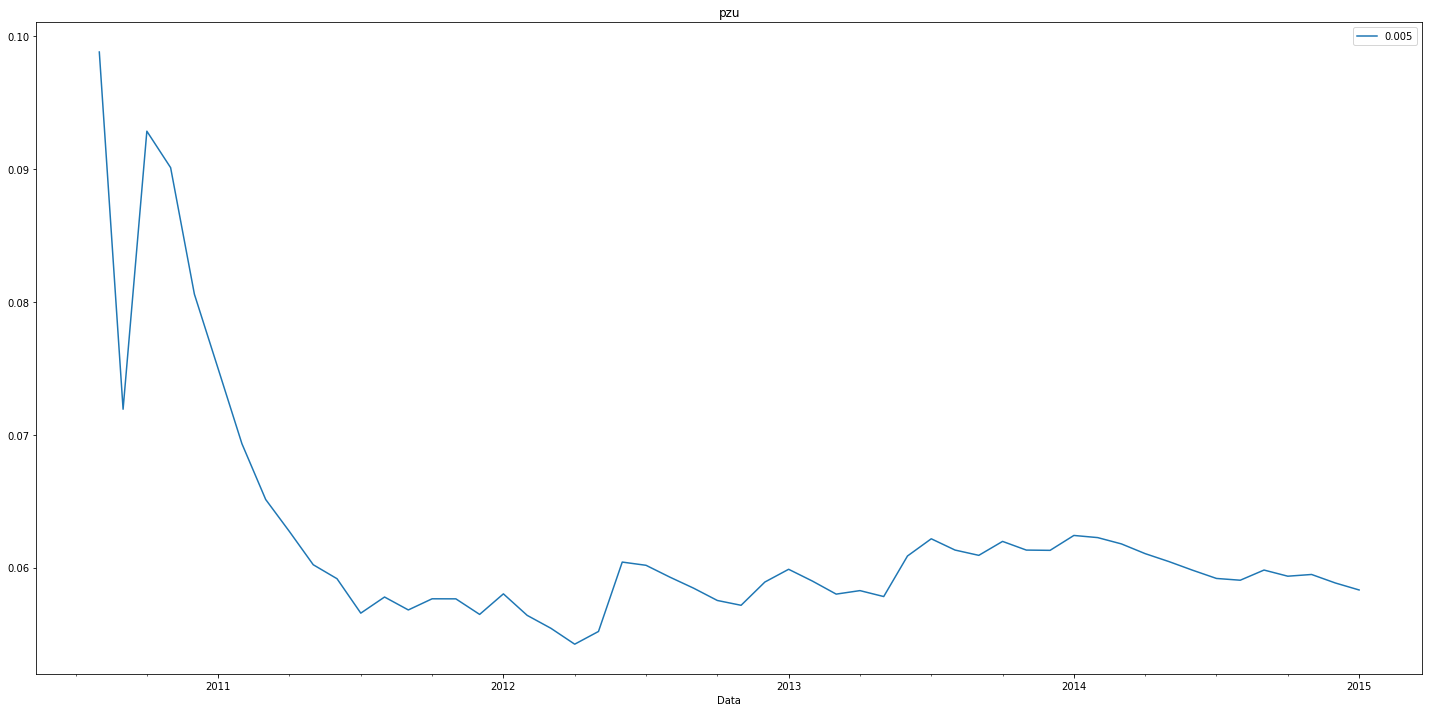

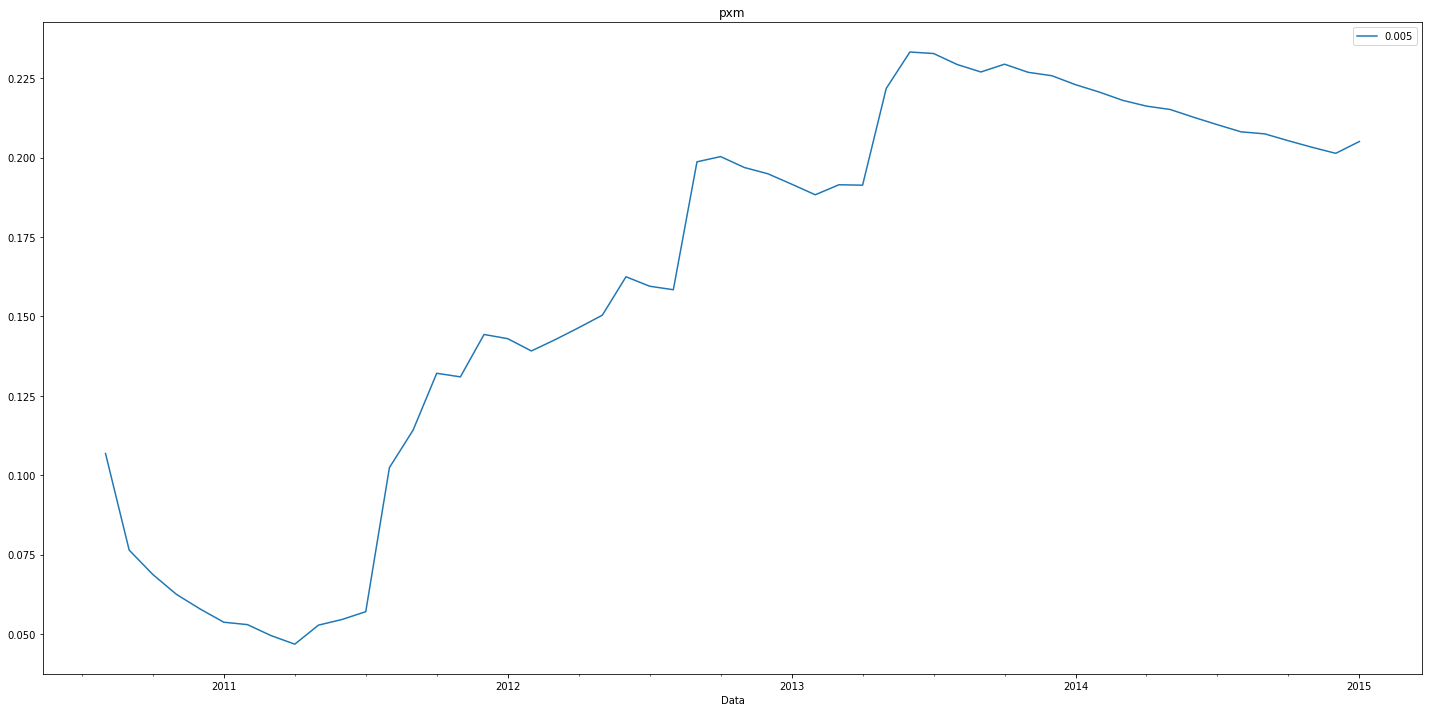

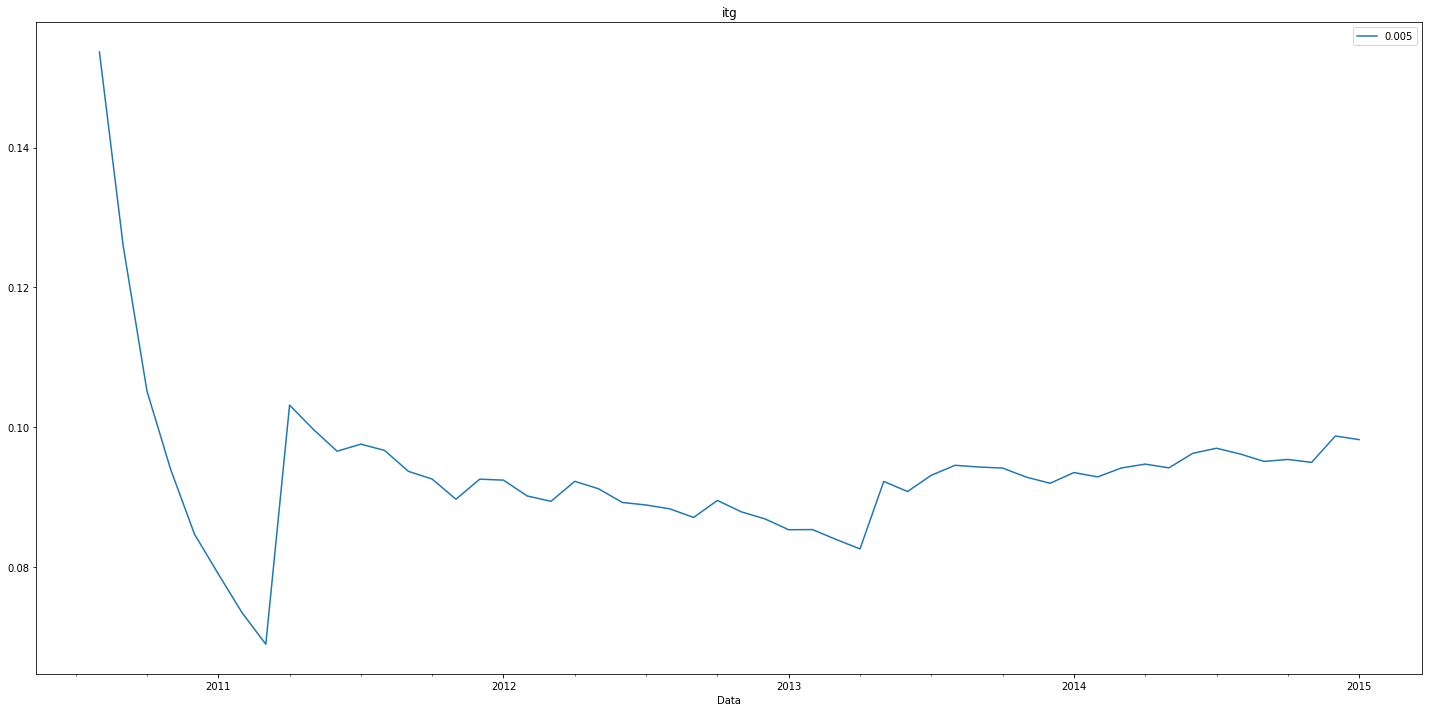

In [9]:
alphas_count = 2
alphas = [0.005]
print(alphas)

def plot_weighted_pct_changes(name, data_frame):
    close = data_frame.pct_change()
    for alpha in alphas:
        close.ewm(alpha=alpha).std().plot(title=name, figsize=figsize, label='{}'.format(alpha))
    
    plt.legend(bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

for name, data_frame in data_frames.items():
    plot_weighted_pct_changes(name, data_frame['Zamkniecie'])

In [10]:
#for name, df in data_frames.items():
#    years = list(range(2011, 2015))
#    for year in years:
#        for month in range(1, 12):
#            date = '{}-{}'.format(year, month)
#            print('{} | {}: {}'.format(name, date, df.loc[df.index > date].pct_change().mean()))

In [52]:
def get_correlation_matrix(data_frames, start_date):
    correlation_dfs = {k: v.loc[v.index >= start_date] for k, v in data_frames.items()}
    mixed_data_frame = pd.concat(correlation_dfs, axis=1)
    return mixed_data_frame.corr()

In [53]:
def calculate_parameters(data_frames, start_date):
    return {
        name: {
            'return': df.loc[df.index >= start_date].pct_change().mean()[0],
            'risk': df.loc[df.index >= start_date].pct_change().std()[0]
        }
        for name, df in data_frames.items()
    }

dates = ['2010-06-01', '2012-01-01', '2013-01-01', '2014-01-01']
parameters_per_date = {date: calculate_parameters(data_frames, date) for date in dates}
corr_matrices = {date: get_correlation_matrix(data_frames, date) for date in dates}
parameters_per_date
corr_matrices

{'2010-06-01':                       itg        pxm        pzu
                Zamkniecie Zamkniecie Zamkniecie
 itg Zamkniecie   1.000000  -0.780105   0.723963
 pxm Zamkniecie  -0.780105   1.000000  -0.690690
 pzu Zamkniecie   0.723963  -0.690690   1.000000,
 '2012-01-01':                       itg        pxm        pzu
                Zamkniecie Zamkniecie Zamkniecie
 itg Zamkniecie   1.000000  -0.635464   0.513320
 pxm Zamkniecie  -0.635464   1.000000  -0.817816
 pzu Zamkniecie   0.513320  -0.817816   1.000000,
 '2013-01-01':                       itg        pxm        pzu
                Zamkniecie Zamkniecie Zamkniecie
 itg Zamkniecie   1.000000  -0.207682  -0.223583
 pxm Zamkniecie  -0.207682   1.000000  -0.681817
 pzu Zamkniecie  -0.223583  -0.681817   1.000000,
 '2014-01-01':                       itg        pxm        pzu
                Zamkniecie Zamkniecie Zamkniecie
 itg Zamkniecie   1.000000   0.816909  -0.784058
 pxm Zamkniecie   0.816909   1.000000  -0.630311
 pzu Zamkn

Wykresy frontu dla danych od:
* czerwca 2010
* stycznia 2012
* stycznia 2013

Wybrać obligacje i je uwzględnić w obliczeniach

Porównać stopy zwrotu tygodniowe i miesięczne

# Wykresy akcji na podstawie wyliczonych stóp zwrotu i ryzyk

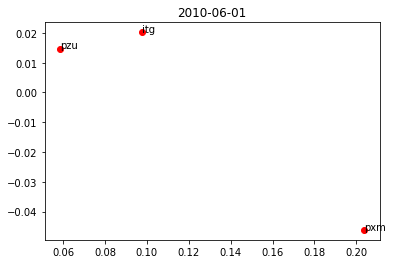

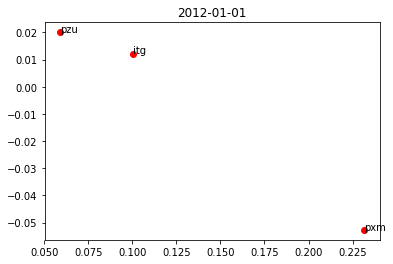

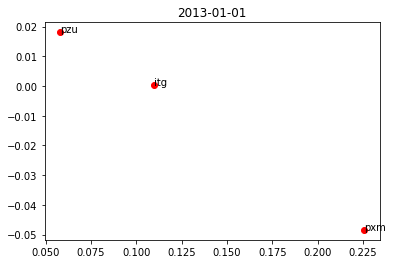

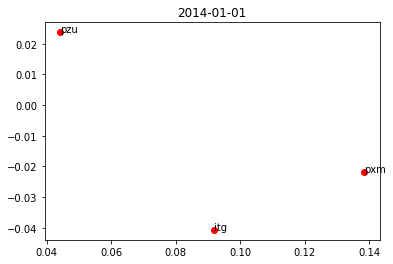

In [21]:
def plot_parameters(parameters_per_date, date):
    parameters = parameters_per_date[date]
    fig, ax = plt.subplots()
    plt.title(date)
    for name, params in parameters.items():
        plt.plot(params['risk'], params['return'], 'ro')
        ax.annotate(name, (params['risk'], params['return']))
    plt.show()

for date in dates:
    plot_parameters(parameters_per_date, date)

### Macierz korelacji

In [22]:
correlation_matrix

itg        pxm        pzu
               Zamkniecie Zamkniecie Zamkniecie
itg Zamkniecie   1.000000  -0.780105   0.723963
pxm Zamkniecie  -0.780105   1.000000  -0.690690
pzu Zamkniecie   0.723963  -0.690690   1.000000

In [24]:
np_correlation_matrix = correlation_matrix.as_matrix()
np_correlation_matrix

array([[ 1.        , -0.78010488,  0.72396325],
       [-0.78010488,  1.        , -0.69068962],
       [ 0.72396325, -0.69068962,  1.        ]])

In [107]:
parameters_per_date['2010-06-01']

{'itg': {'return': 0.020243986836629858, 'risk': 0.097578012854485724},
 'pxm': {'return': -0.046168102990059252, 'risk': 0.20378797622357628},
 'pzu': {'return': 0.014770070385244702, 'risk': 0.058519929235306918}}

In [108]:
def calculate_weighted_params(weights, returns, risks, correlation):
    n = len(weights)
    weighted_return = np.sum(weights * returns)
    weighted_risk = np.sqrt(np.sum(
            [np.sum([weights[i] * weights[j] * risks[i] * risks[j] * correlation[i, j]
                 for j in range(n)])
         for i in range(n)]))
    return weighted_risk, weighted_return

In [109]:
def calculate_portfolios(returns, risks, correlation):
    for w1 in np.linspace(0.00, 1.0, plot_density):
        m2 = 1.0 - w1
        for w2 in np.linspace(0.00, m2, plot_density):
            weights = np.array([w1, w2, 1 - w1 - w2])
            yield (tuple(weights), tuple(calculate_weighted_params(weights, returns, risks, correlation)))

In [117]:
def split_portfolios(portfolios):
    portfolios_set = set(portfolios)
    best = lambda x: not any([p[1][0] <= x[1][0] and x[1][1] <= p[1][1] for p in portfolios_set - set([x])])
    optimals = set(filter(best, portfolios))
    return (optimals, portfolios_set - optimals)

In [135]:
def plot_portfolios(returns, risks, correlation, plot_density):
    portfolios = tuple(calculate_portfolios(returns, risks, correlation))
    optimals, non_optimals = split_portfolios(portfolios)
    
    for k, v in non_optimals:
        plt.plot(*v, 'ro')
    for k, v in optimals:
        plt.plot(*v, 'go')

In [136]:
keys = data_frames.keys()

def plot_portfolios_from_date(date, plot_density=10):
    returns = np.array([parameters_per_date[date][k]['return'] for k in keys])
    risks = np.array([parameters_per_date[date][k]['risk'] for k in keys])

    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_title(date)
    for name, params in parameters_per_date[date].items():
        plt.plot(params['risk'], params['return'], 'ro')
        ax.annotate(name, (params['risk'], params['return']))

    plot_portfolios(returns, risks, corr_matrices[date].as_matrix(), plot_density)

### Efficient frontier bez pozycji krótkich, dla akcji ITG, PXM i PZU

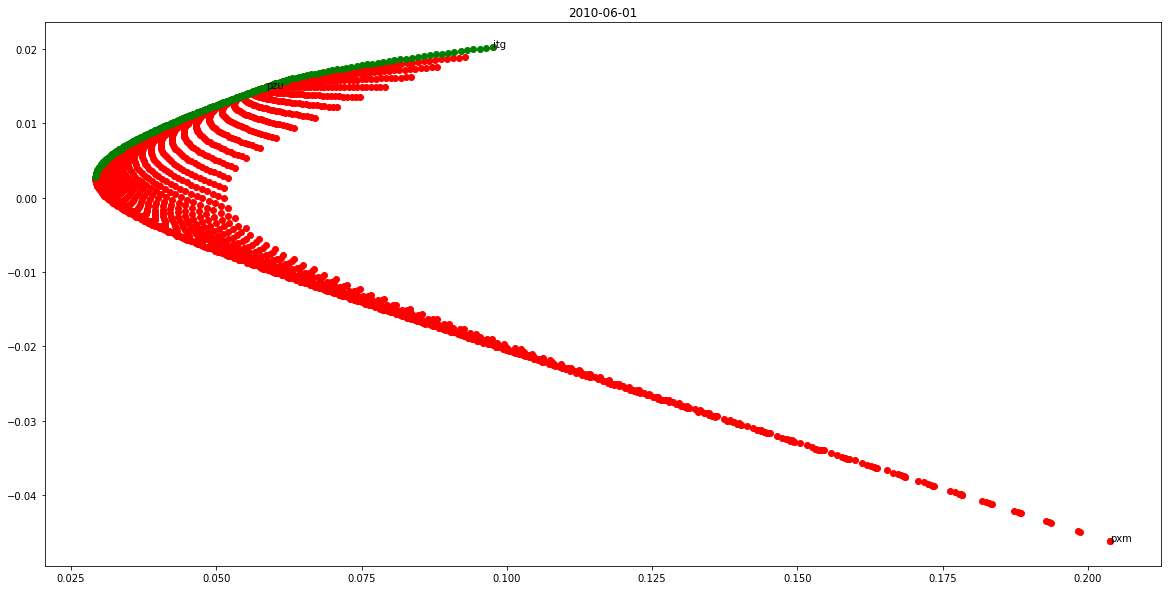

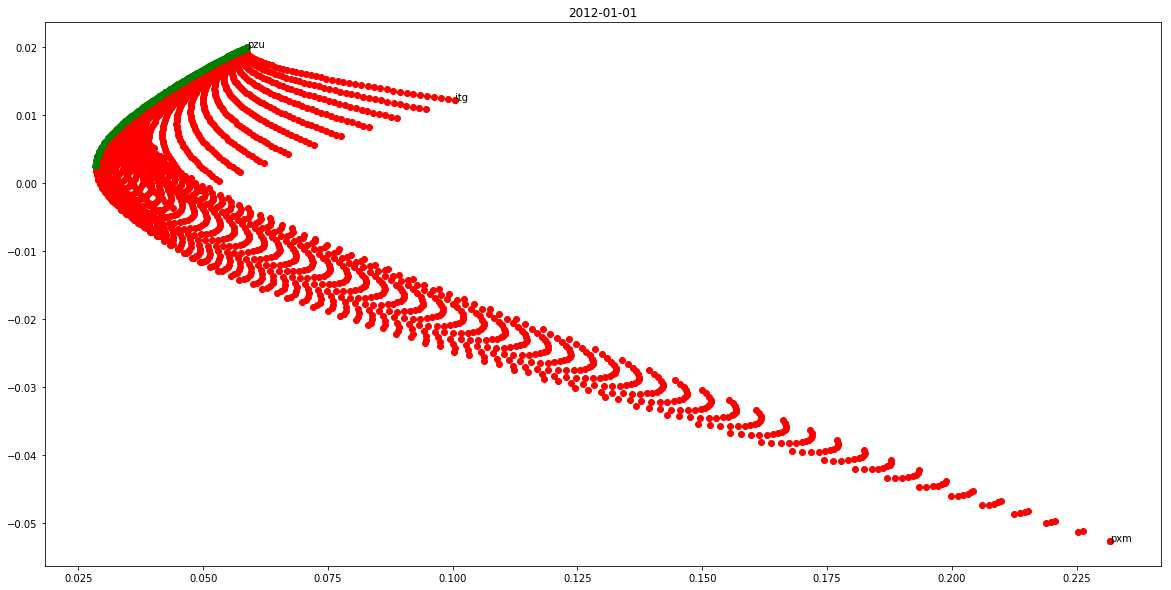

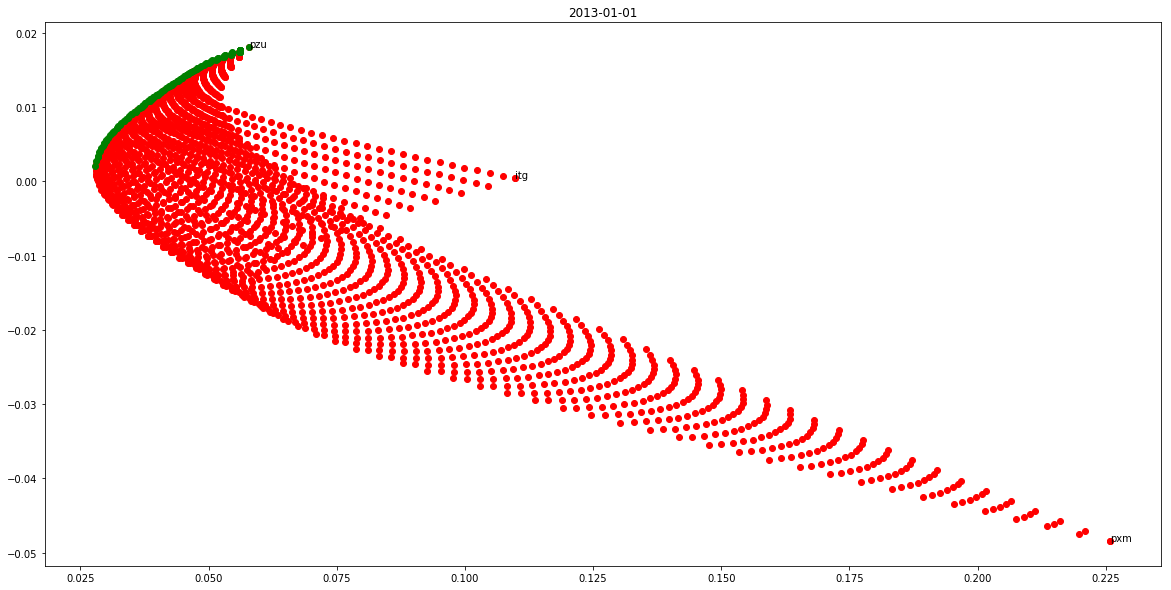

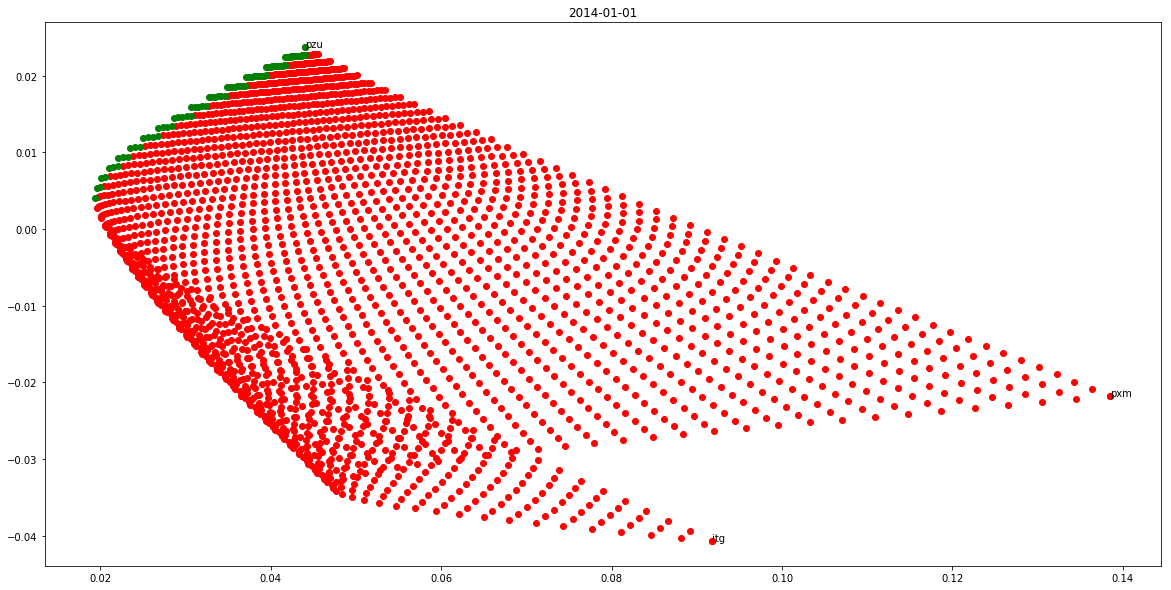

In [137]:
plot_density = 50

for date in dates:
    plot_portfolios_from_date(date, plot_density)
    plt.show()